# Bounding Box

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img1 = cv2.imread('./images/image2.jpg', 1)
img2 = cv2.imread('./images/image2.jpg', 0)

In [3]:
b,g,r = cv2.split(img1)
col_img = cv2.merge((r,g,b))

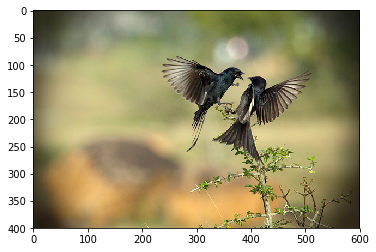

In [4]:
plt.imshow(col_img)
plt.show()

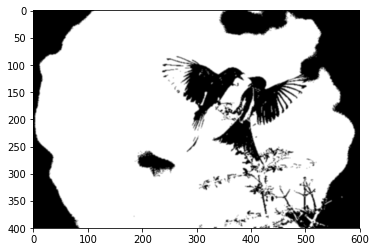

In [5]:
ret, thresh1 = cv2.threshold(cv2.cvtColor(col_img, cv2.COLOR_BGR2GRAY), 
                             100, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray', interpolation = 'bicubic')
plt.show()

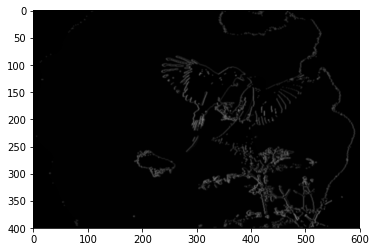

In [10]:
# find contours and get the external one
image, contours, hier = cv2.findContours(thresh1, cv2.RETR_TREE,
                cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(image, cmap='gray', interpolation = 'bicubic')
plt.show()

In [7]:
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a red 'nghien' rectangle
    cv2.drawContours(img2, [box], 0, (0, 0, 255))
 
    # finally, get the min enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # convert all values to int
    center = (int(x), int(y))
    radius = int(radius)
    # and draw the circle in blue
#     img = cv2.circle(img2, center, radius, (255, 0, 0), 2)

In [8]:
print(len(contours))

112


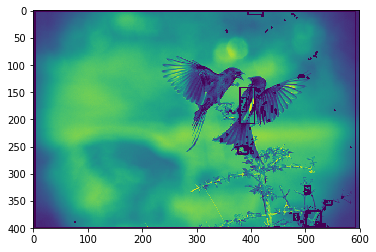

In [9]:
plt.imshow(img2)
plt.show()